# CSE 5524 HW2 Utkarsh Pratap Singh Jadon

## Import all necessary libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import math

## Read and display image

In [3]:
image_affleck =cv2.imread('affleck_gray.png') 
#cv2.imshow('Ben Affleck!',image_affleck)
#cv2.waitKey()
#cv2.destroyAllWindows()

## 1. Applying Gaussian Blur

We will apply gaussian blur on the input image. First we will start from higher values of sigma and progressively decrease the sigma Here sigma is taken in the form of a numpy array

In [4]:
def guessActor(image1):
#function to play a game called guess the actor. The image gets progressively sharper. Whoever guesses it at the highest sigma wins.
#The function writes the blurred images to disk
    sigma_array=np.array([20,15,10,5,2,1])
    for sigma in sigma_array:
        blur_img=cv2.GaussianBlur(image1,(2*math.ceil(3*sigma)+1,2*math.ceil(3*sigma)+1),sigma) #Gaussianblur function takes sigmaY=sigmaX when sigmaY is not passed
        cv2.imwrite('sigma_equals_' +str(sigma)+'.png', blur_img) #scikit image loads into rgb
        cv2.imshow('Guess Who?',blur_img)
        cv2.waitKey()
        cv2.destroyAllWindows()
#guessActor(image_affleck)
#My friend guessed the actor at sigma =5, I also had to give him a clue (This guy was in a superhero movie that starts with the letter B)

## 2. Function to compute 2D Gaussian Derivative

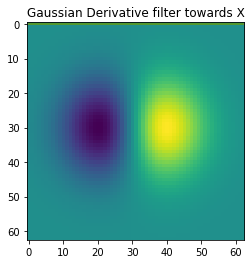

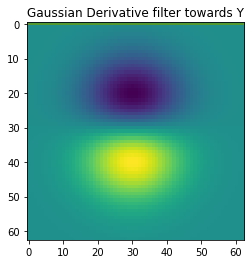

In [5]:
def gaussDeriv2D(sigma):
    x=np.arange(-3*math.ceil(sigma),3*math.ceil(sigma+1),1)     #choosing a 3-sigma coverage
    y=np.arange(-3*math.ceil(sigma),3*math.ceil(sigma+1),1)    #choosing a 3-sigma coverage
    factor = 1/(2*math.pi*math.pow(sigma,4))  #the scalar factor being multiplied in the formula
    Gx=np.zeros((y.size,x.size))
    Gy=np.zeros((y.size,x.size))
    for j in range(0,y.size,1):           #calculating each element of the 2D Gaussian X gradient filter
        for i in range(0,x.size,1):
            Gx[j][i]=x[i]*np.exp(-(x[i]*x[i]+y[j]*y[j])/(2*sigma**2))*factor #remove the negative sign from the formula to get filter in increasing-axis direction
    for j in range(0,y.size,1):             #calculating each element of the 2D Gaussian Y gradient filter
        for i in range(0,x.size,1):      
            Gy[j][i]=y[j]*np.exp(-(x[i]*x[i]+y[j]*y[j])/(2*sigma**2))*factor #remove the negative sign from the formula to get filter in increasing-axis direction
    return [Gx,Gy]
[Gx,Gy]=gaussDeriv2D(10) #function-call
plt.title('Gaussian Derivative filter towards X')
plt.imshow(Gx, aspect='equal', extent=None)
plt.plot(Gx)
plt.pause(0.1) # pause for 0.1 second
plt.title('Gaussian Derivative filter towards Y')
plt.plot(Gy)
plt.imshow(Gy, aspect='equal', extent=None)

## 3. Calculate Gaussian Gradient X and Y and then the gradient magnitude applied to the web image

We will first convert the image to grayscale. Then we will apply the gradient on the image and compute the magnitude of the gradients

Image Source -BuckeyesWire.usatoday, Article on the Web -https://buckeyeswire.usatoday.com/2021/09/07/2021-ohio-state-football-schedule-downloadable-wallpaper/

In [8]:
import scipy.ndimage #import library

In [ ]:
#Read and Display the Web image
osu_fans = cv2.imread('OSU-Fan.png') #reading image
gray_osu_fans = cv2.cvtColor(osu_fans, cv2.COLOR_BGR2GRAY) #converting to grayscale
cv2.imshow('Image',gray_osu_fans) #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Gray-OSU-Fan.png',gray_osu_fans)

#calculate Gaussian X

gx_img=scipy.ndimage.correlate(gray_osu_fans, Gx, mode='nearest') #applied the gaussian X - Gx gradient filter 
cv2.imshow('Gaussian-X',gx_img)  #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Gaussian-X.png',gx_img)

#calculate Gaussian Y

gy_img=scipy.ndimage.correlate(gray_osu_fans, Gy, mode='nearest') #applied the gaussian Y - Gy gradient filter
cv2.imshow('Gaussian-Y',gy_img)  #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Gaussian-Y.png',gy_img)

#Calculate magnitude

magIm = np.sqrt(gx_img*gx_img + gy_img*gy_img,dtype=np.float) #mentioned the dtype parameter to prevent float to int conversions
cv2.imshow('Image',magIm)  #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()

## 4. Experimenting with the Threshold

In [ ]:
t=[5,4,3,2.5,2,1.5,1,0.5]  #array for threshold values
for x in t:
    tIm=np.array(magIm>x,dtype=np.float) #set threshold value
    cv2.imshow('Image',tIm)  #display the grayscale image
    cv2.waitKey()
    cv2.destroyAllWindows()
# t=1 gives the best results of least noise and subject capture

## 5. Sobel X and Sobel Y calculations

In [ ]:
# Sobel X Calculations
x_sobel=scipy.ndimage.sobel(gray_osu_fans, axis=-0, output=None, mode='reflect', cval=0.0)
cv2.imshow('Sobel - X direction', x_sobel)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Sobel - X direction.png',x_sobel)

In [ ]:
# Sobel Y Calculations
y_sobel=scipy.ndimage.sobel(gray_osu_fans, axis=- 1, output=None, mode='reflect', cval=0.0)
cv2.imshow('Sobel - Y - direction',y_sobel)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Sobel - Y direction.png',y_sobel)

In [ ]:
# Sobel magnitude calculations
magIm = np.sqrt(x_sobel*x_sobel +y_sobel*y_sobel,dtype=np.float) #mentioned the dtype parameter to prevent float to int conversions
cv2.imshow('Sobel Magnitude',magIm)  #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Sobel_magnitude.png',magIm)
# As it can be seen,  in the sobel filter, more background information is present than in the gaussian gradient filter

## Canny Calculations

In [ ]:
# I used cv2.Canny to get the canny function
canny = cv2.Canny(gray_osu_fans,72,180) #using the same image OSU Fan image as above
#lower threshold =72 and higher threshold is 180
cv2.imshow('Canny',canny)  #display the grayscale image
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('Canny.png',canny)
#Canny is perfectly identifying the main subject. All the background noise is absent. So it is performing well as compared to both Gaussiam and Sobel filter